#**GUVI CAPSTONE PROJECT 4 - Clustering Music Genres Using Python**

*-ASTER NATHAN*

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [294]:
data = pd.read_csv('/content/Spotify-2000.csv')

In [295]:
data.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [296]:
data.shape

(1994, 15)

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [298]:
data.select_dtypes(include='object').nunique()

Title                1958
Artist                731
Top Genre             149
Length (Duration)     350
dtype: int64

In [299]:
data=data.set_index('Index')

In [300]:
data.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [301]:
data.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [302]:
data.isnull().sum()

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

#**EDA**

In [303]:
data.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1 to 1994
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 233.7+ KB


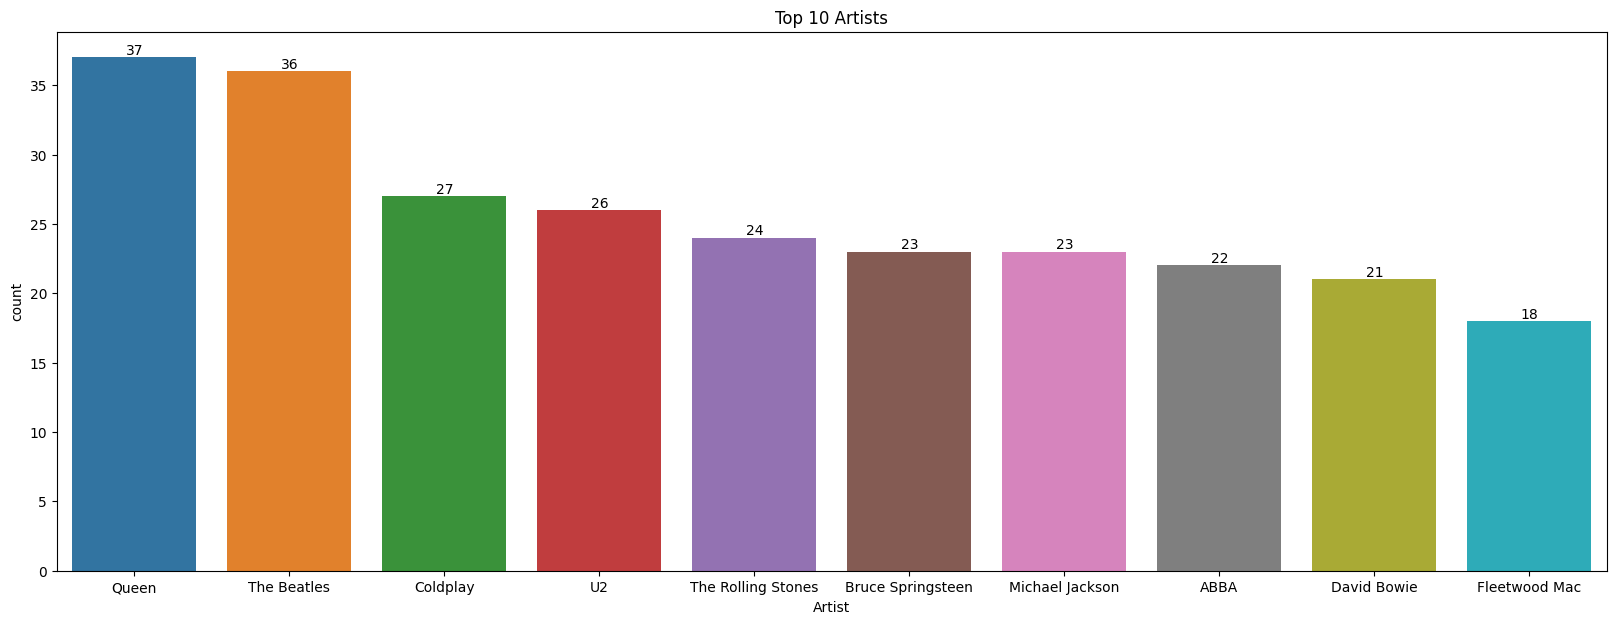

In [305]:
plt.figure(figsize = (20,7))
ax1 = sns.countplot(x = 'Artist',data=data,order=pd.value_counts(data['Artist']).iloc[:10].index)
plt.title("Top 10 Artists")
for label in ax1.containers:
    ax1.bar_label(label)
plt.show()

The visualization gives us an insight on the Top 10 Artistis with the most streams.

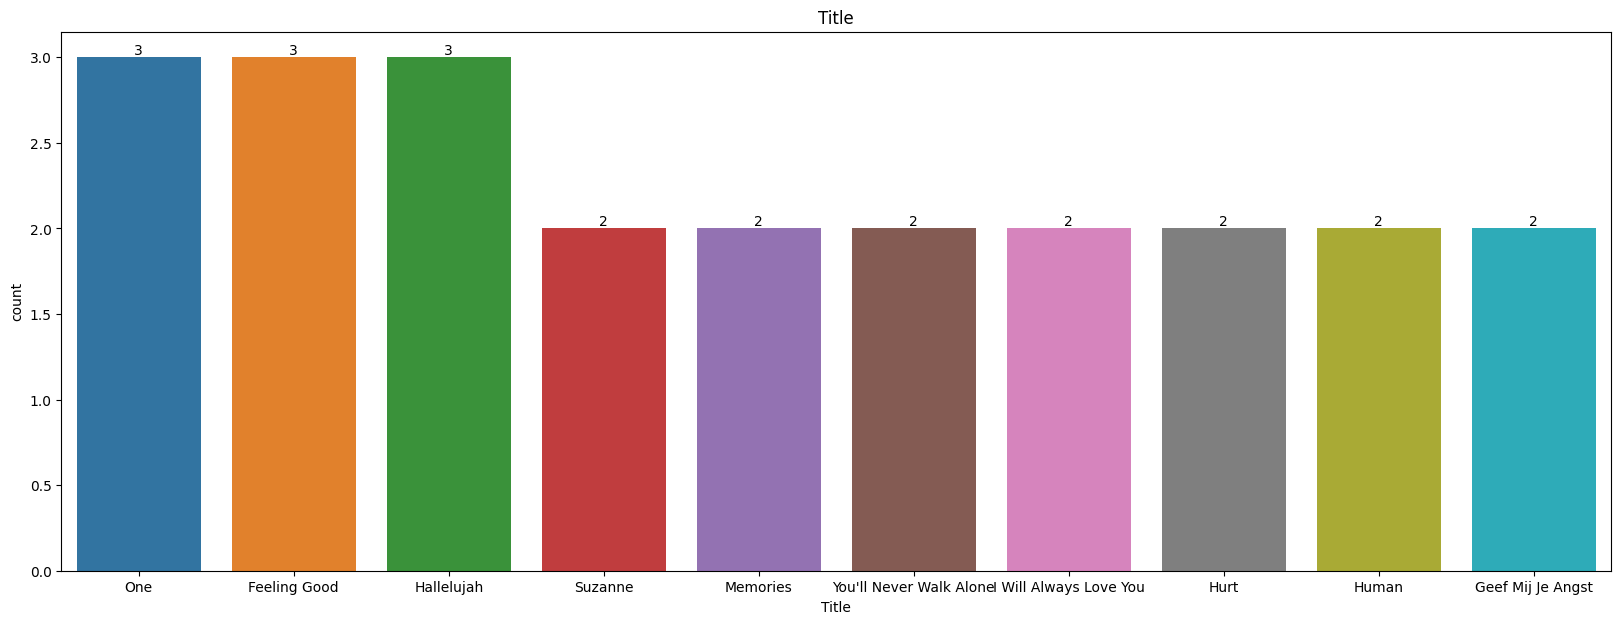

In [306]:
plt.figure(figsize = (20,7))
ax1 = sns.countplot(x = 'Title',data=data,order=pd.value_counts(data['Title']).iloc[:10].index)
plt.title("Title")
for label in ax1.containers:
    ax1.bar_label(label)
plt.show()

The visualization gives us an insight on the top 10 Titles/Songs with the count of most streams

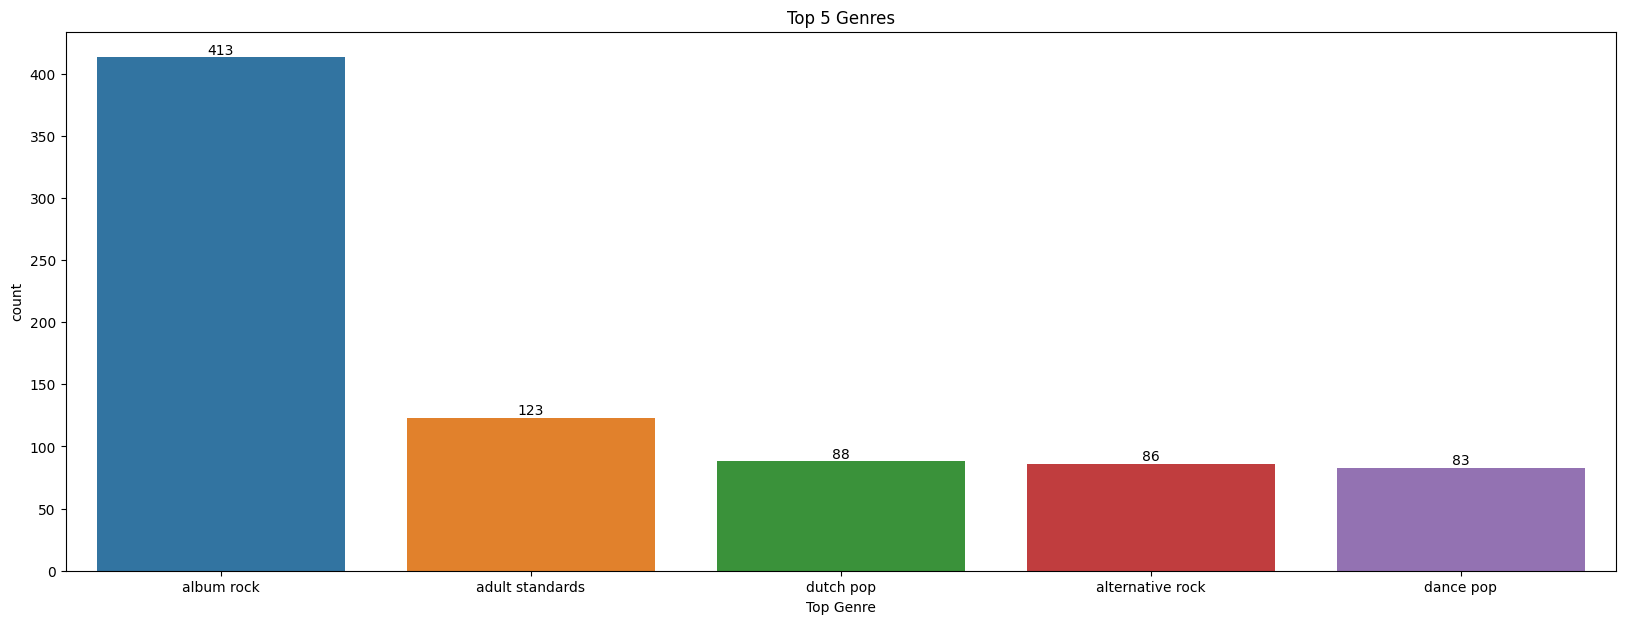

In [307]:
plt.figure(figsize = (20,7))
ax1 = sns.countplot(x = 'Top Genre',data=data,order=pd.value_counts(data['Top Genre']).iloc[:5].index)
plt.title("Top 5 Genres")
for label in ax1.containers:
    ax1.bar_label(label)
plt.show()

The visualization displays the Top 5 Music genres preferred by the Music Lovers.

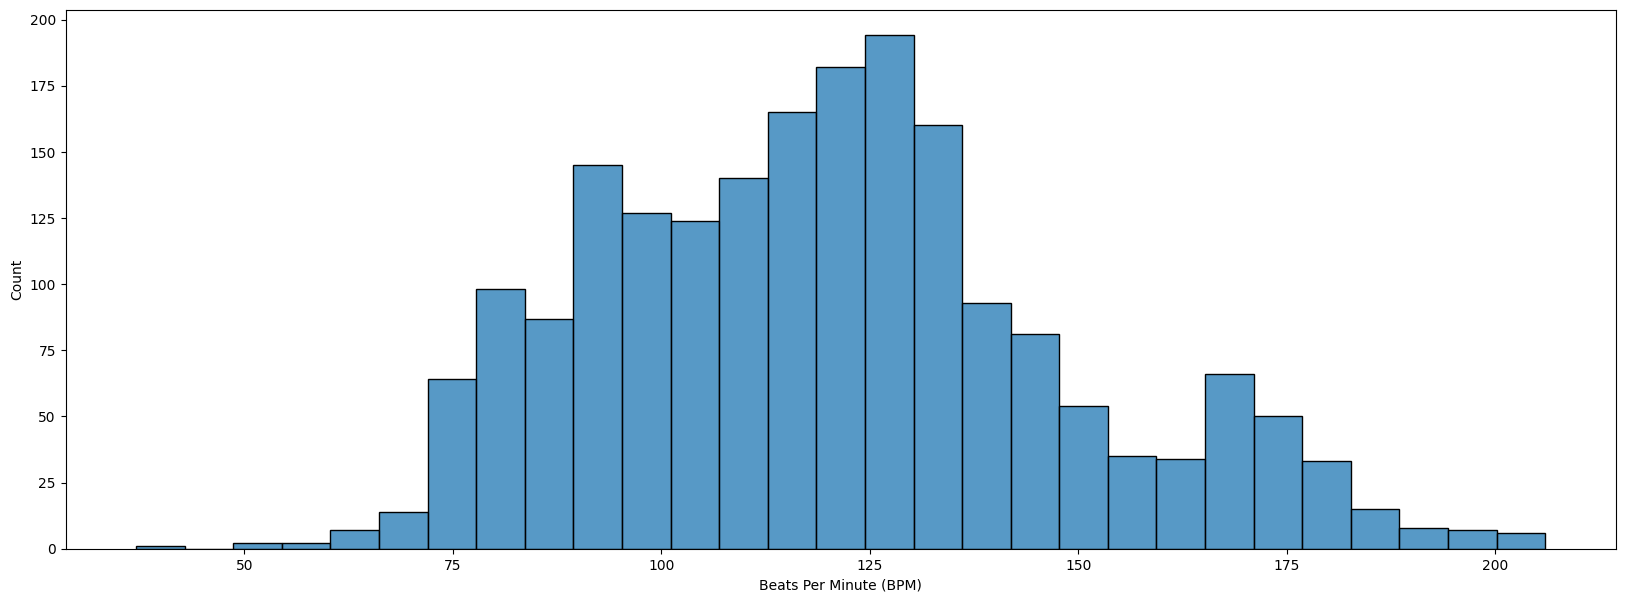

In [308]:
plt.figure(figsize = (20,7))
sns.histplot(x = 'Beats Per Minute (BPM)',data=data)
plt.show()

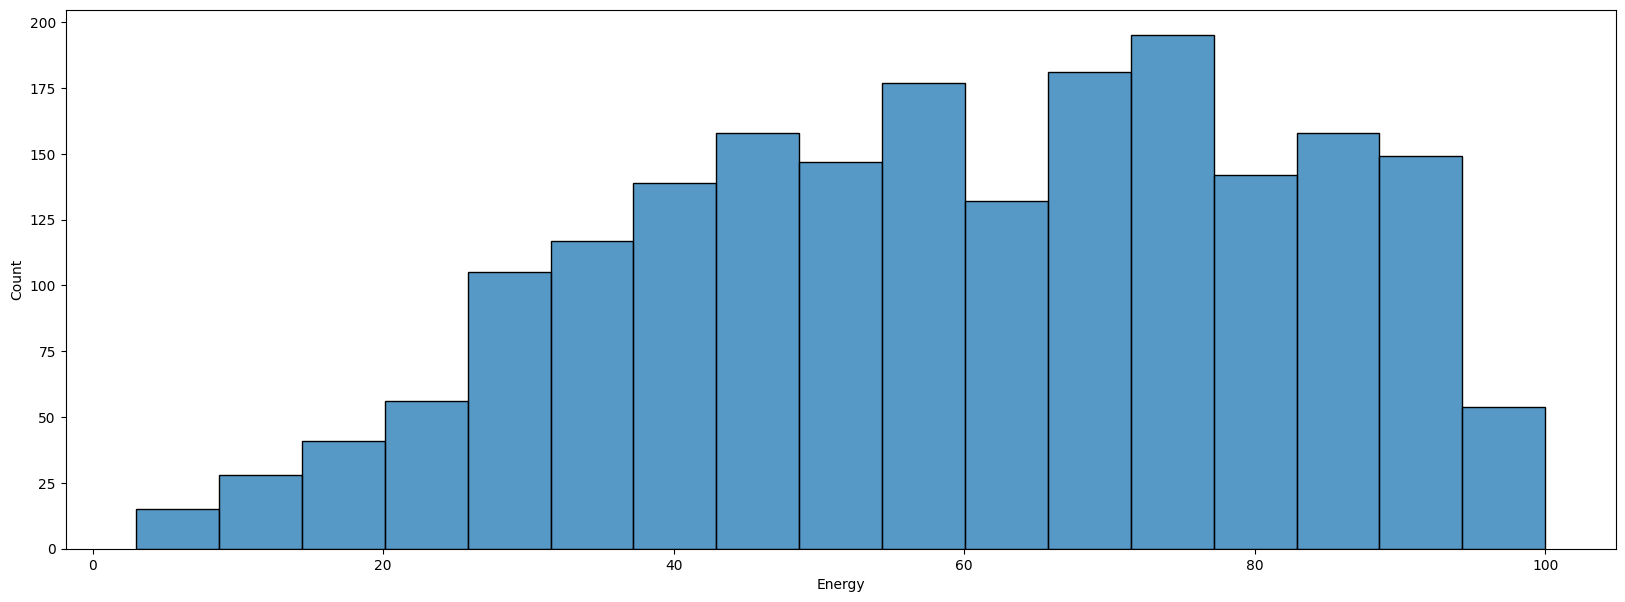

In [309]:
plt.figure(figsize = (20,7))
sns.histplot(x = 'Energy',data=data)
plt.show()

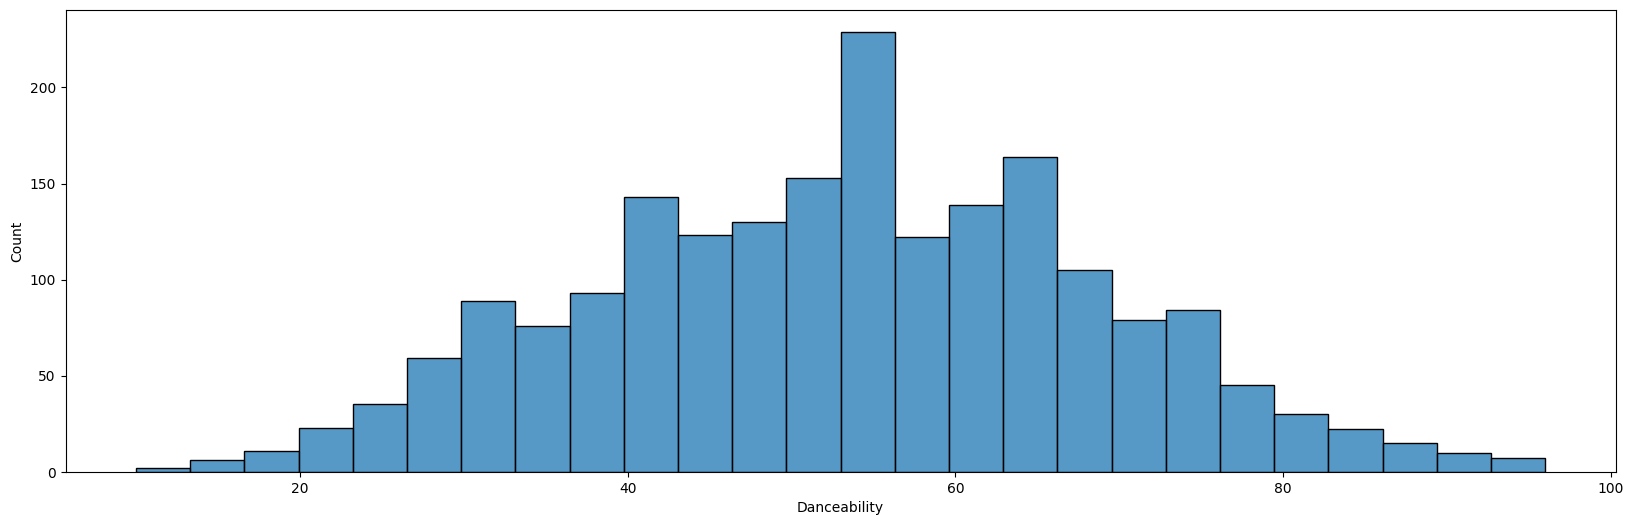

In [310]:
plt.figure(figsize = (20,6))
sns.histplot(x = 'Danceability',data=data)
plt.show()

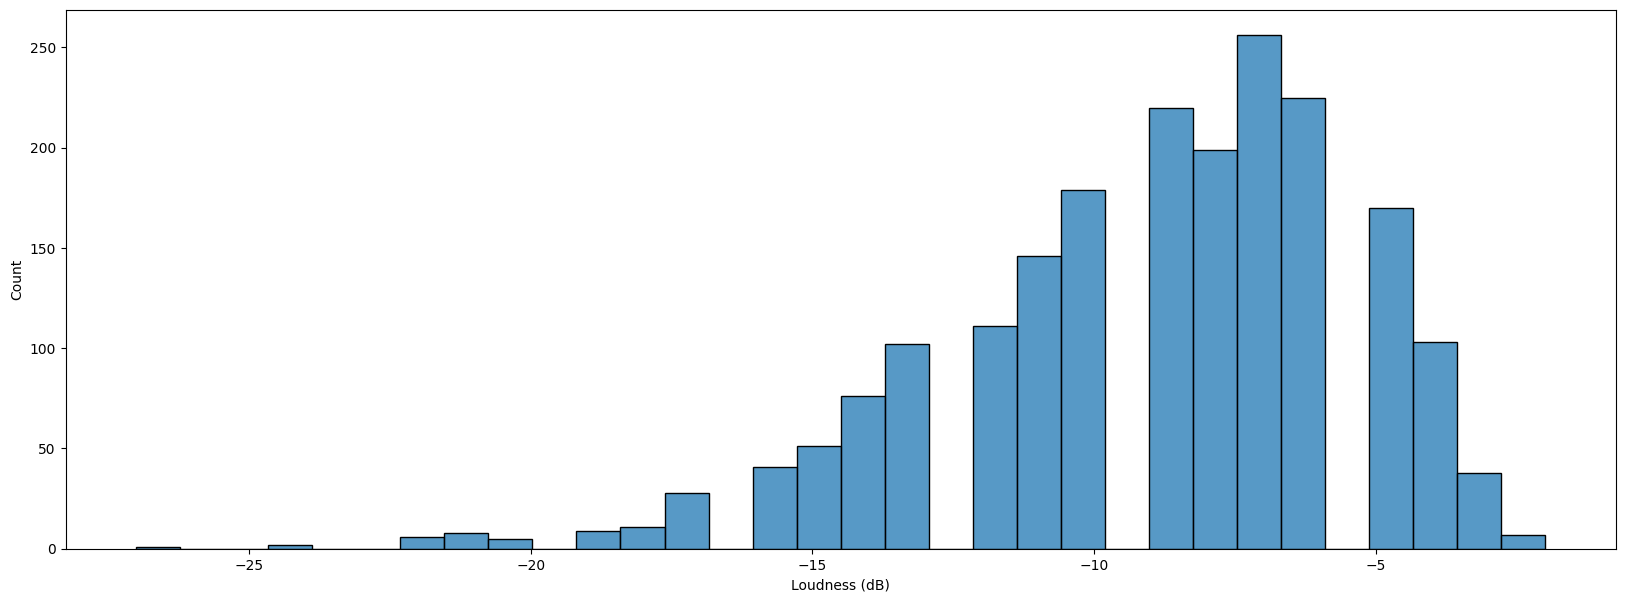

In [311]:
plt.figure(figsize = (20,7))
sns.histplot(x = 'Loudness (dB)',data=data)
plt.show()

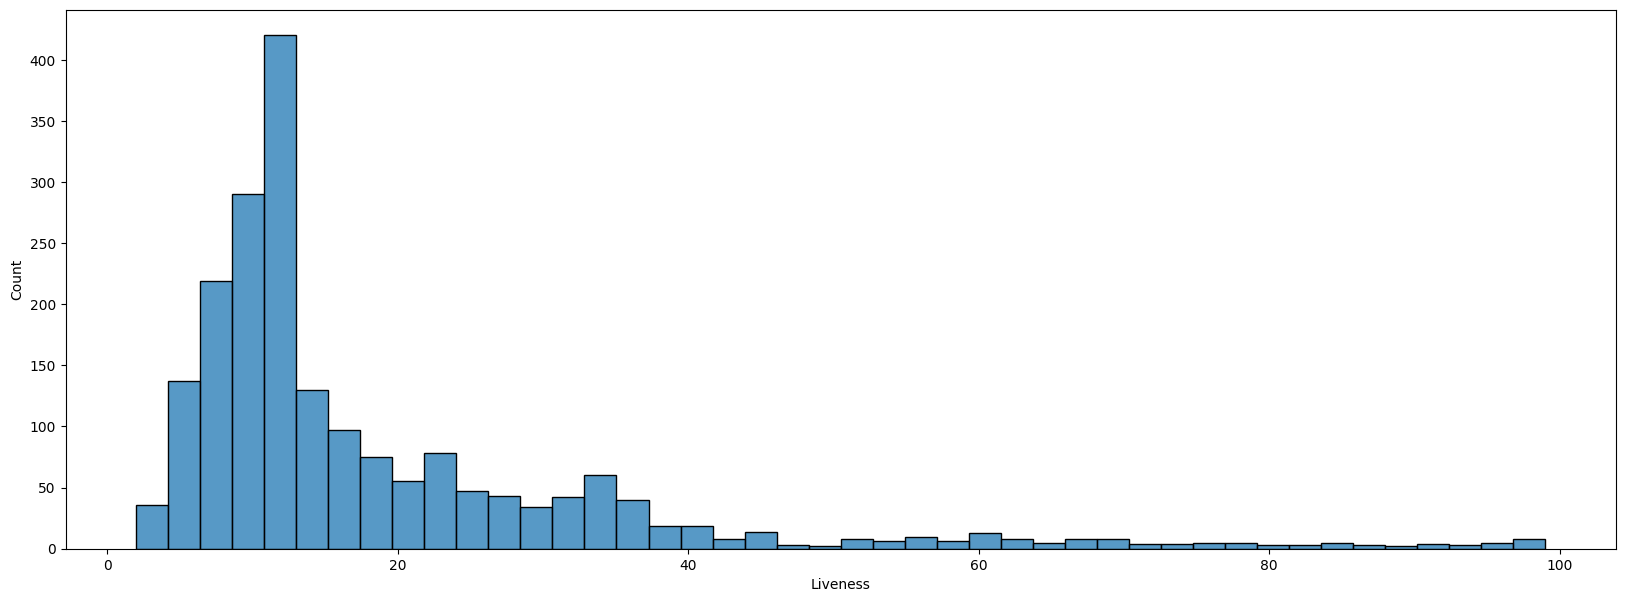

In [312]:
plt.figure(figsize = (20,7))
sns.histplot(x = 'Liveness',data=data)
plt.show()

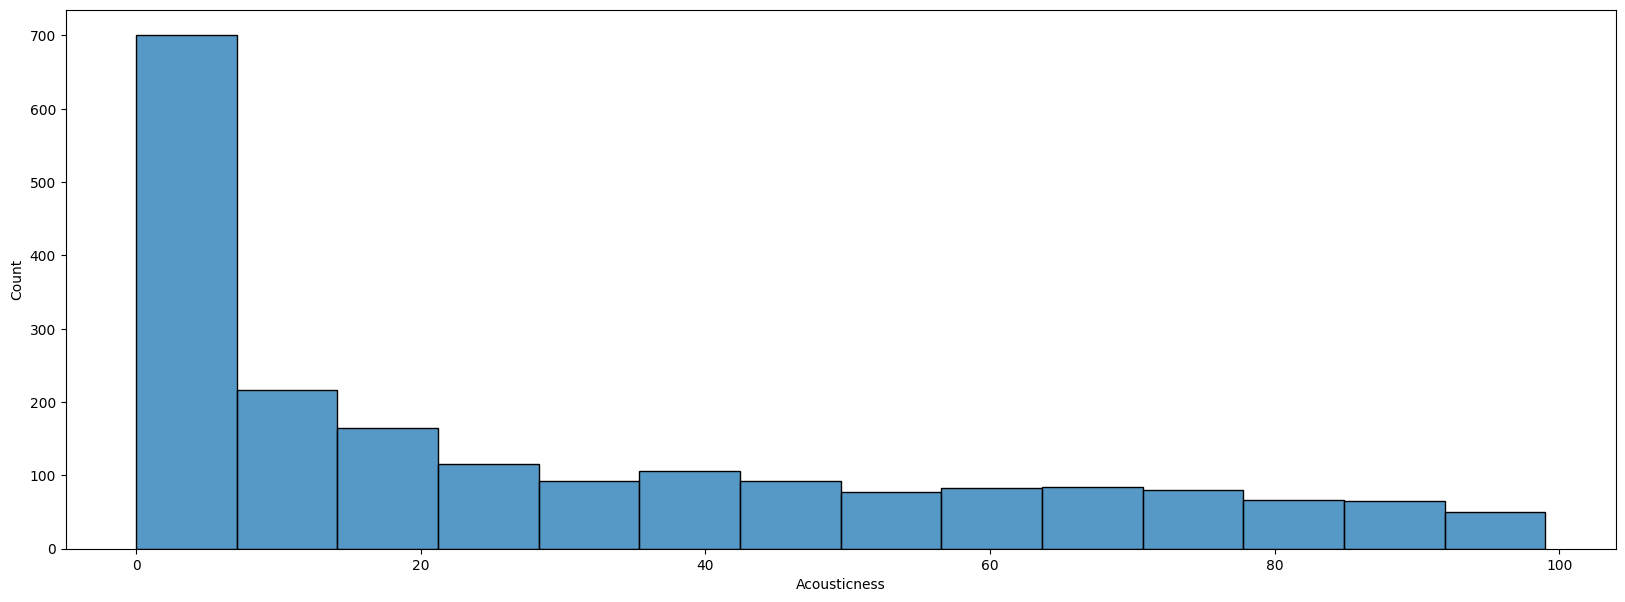

In [313]:
plt.figure(figsize = (20,7))
sns.histplot(x = 'Acousticness',data=data)
plt.show()

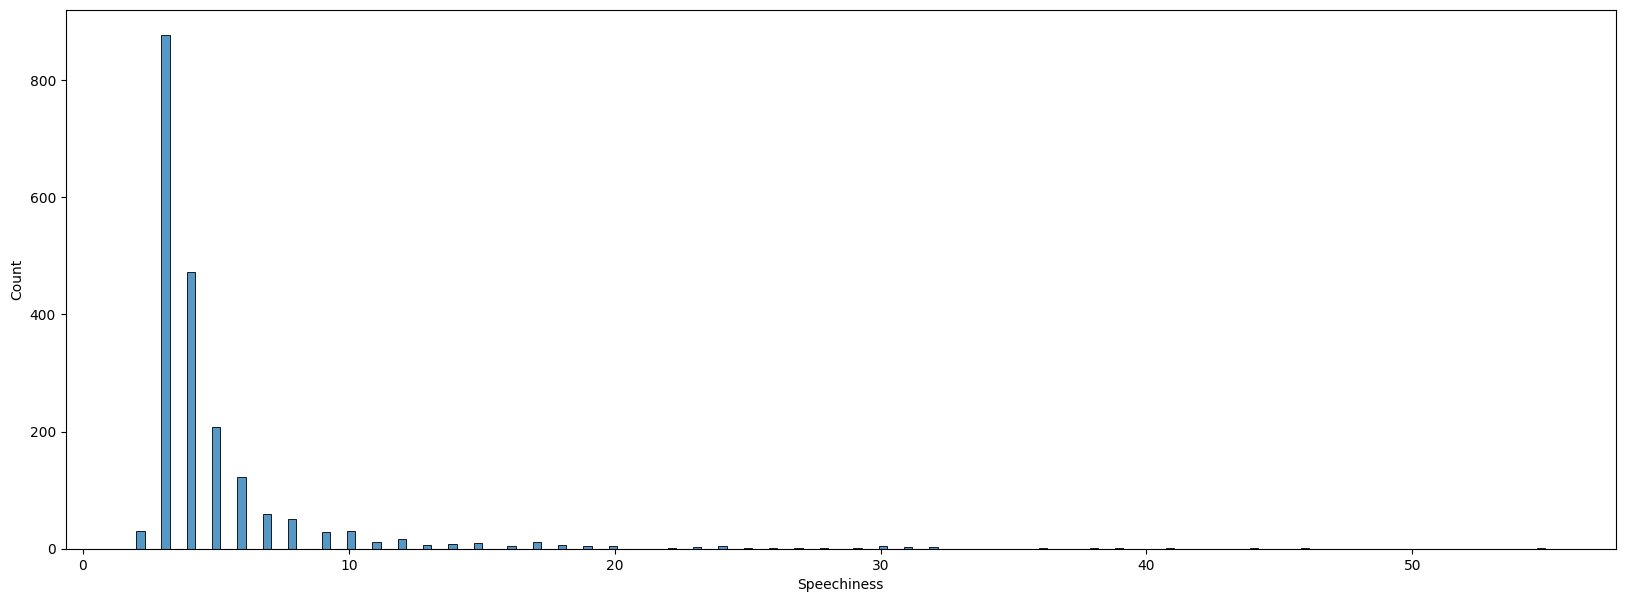

In [314]:
plt.figure(figsize = (20,7))
sns.histplot(x = 'Speechiness',data=data)
plt.show()

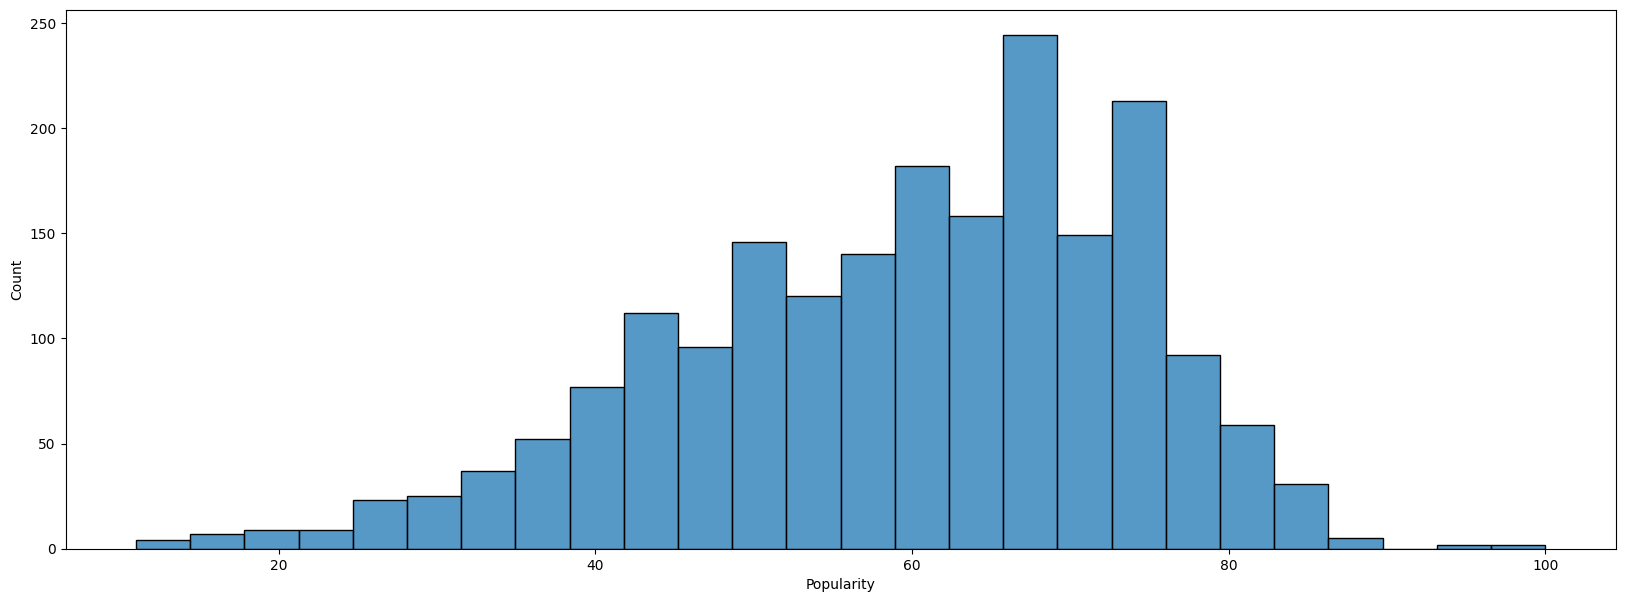

In [315]:
plt.figure(figsize = (20,7))
sns.histplot(x = 'Popularity',data=data)
plt.show()

#**REGRESSION PLOTS**

In [316]:
data.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


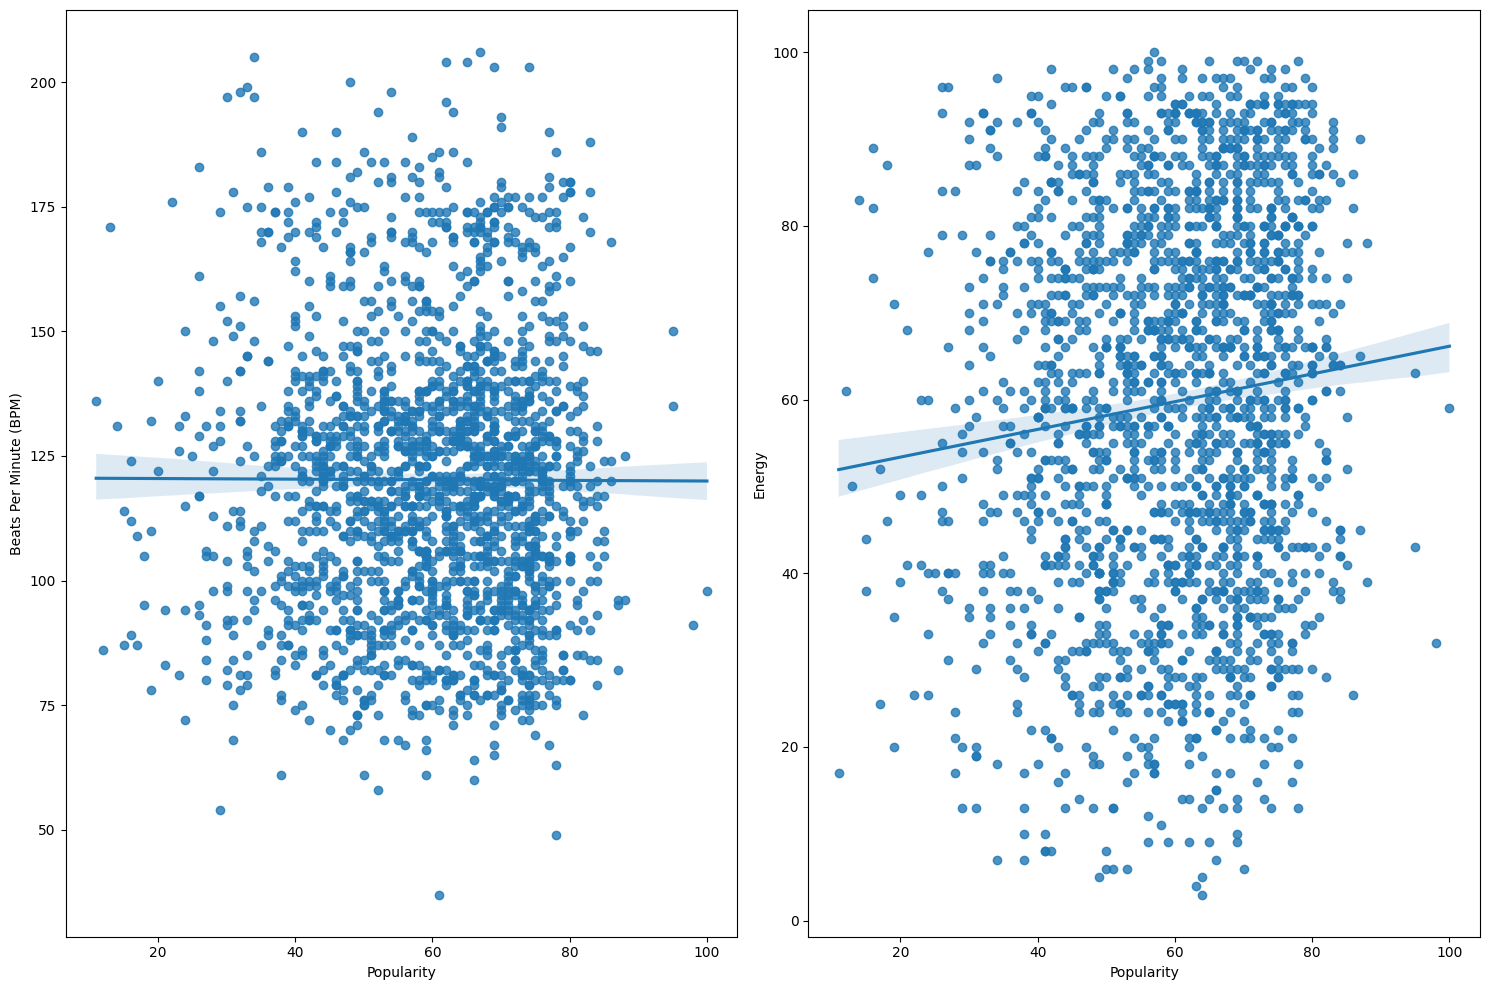

In [317]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=data['Popularity'], y=data['Beats Per Minute (BPM)'], ax=ax1);
sns.regplot(x=data['Popularity'], y=data['Energy'], ax=ax2);
plt.tight_layout()

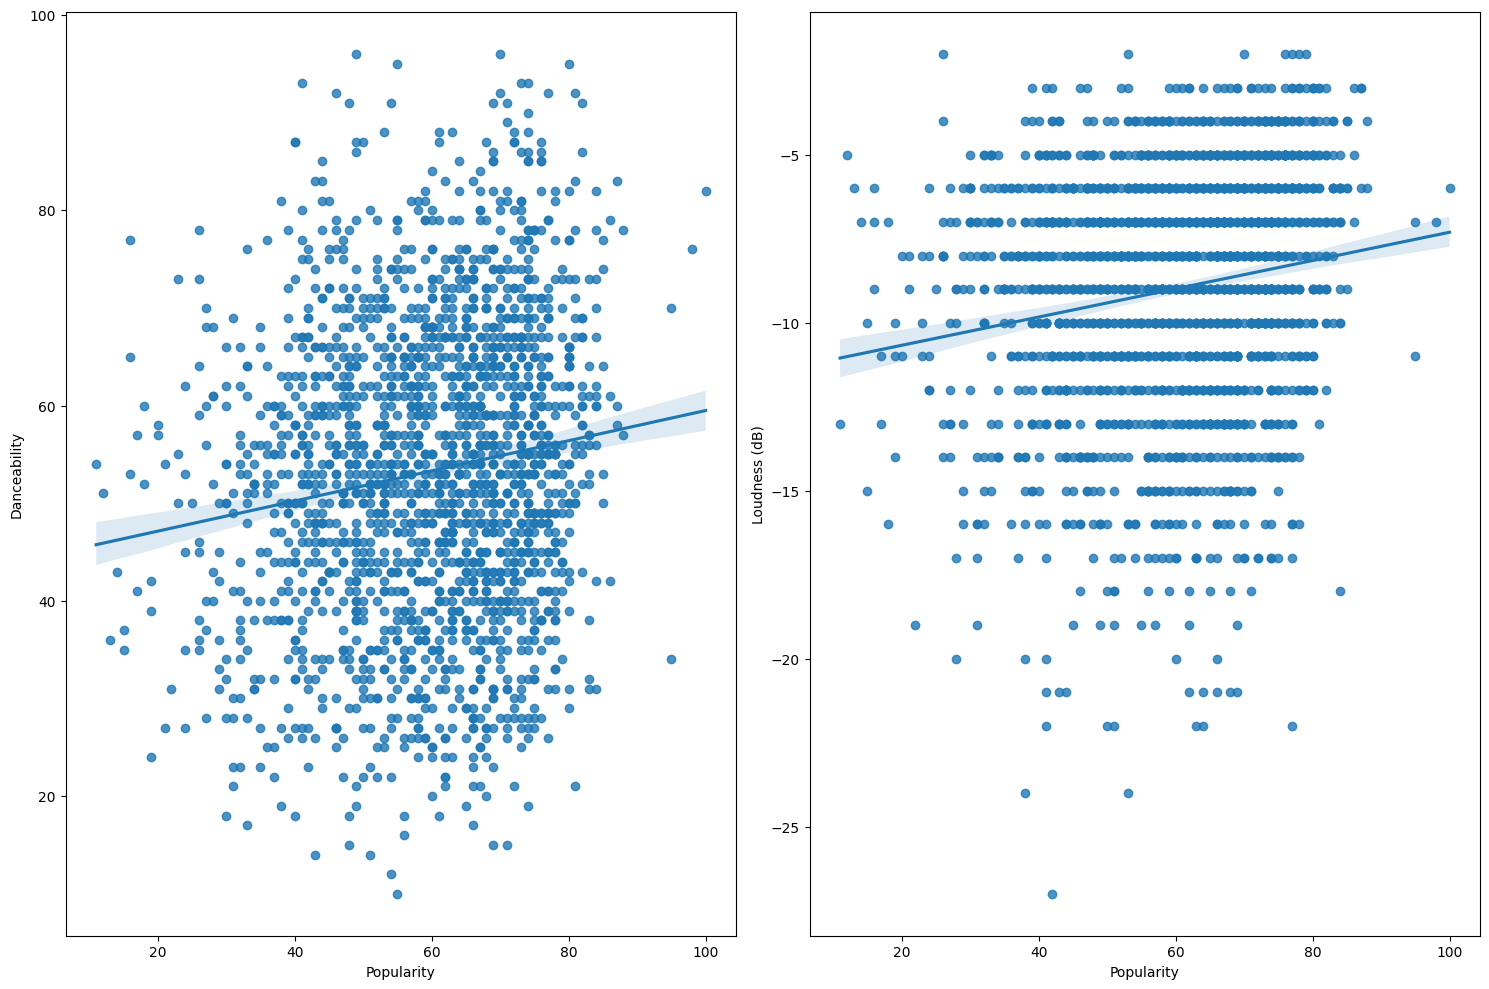

In [318]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=data['Popularity'], y=data['Danceability'], ax=ax1)
sns.regplot(x=data['Popularity'], y=data['Loudness (dB)'], ax=ax2)
plt.tight_layout()

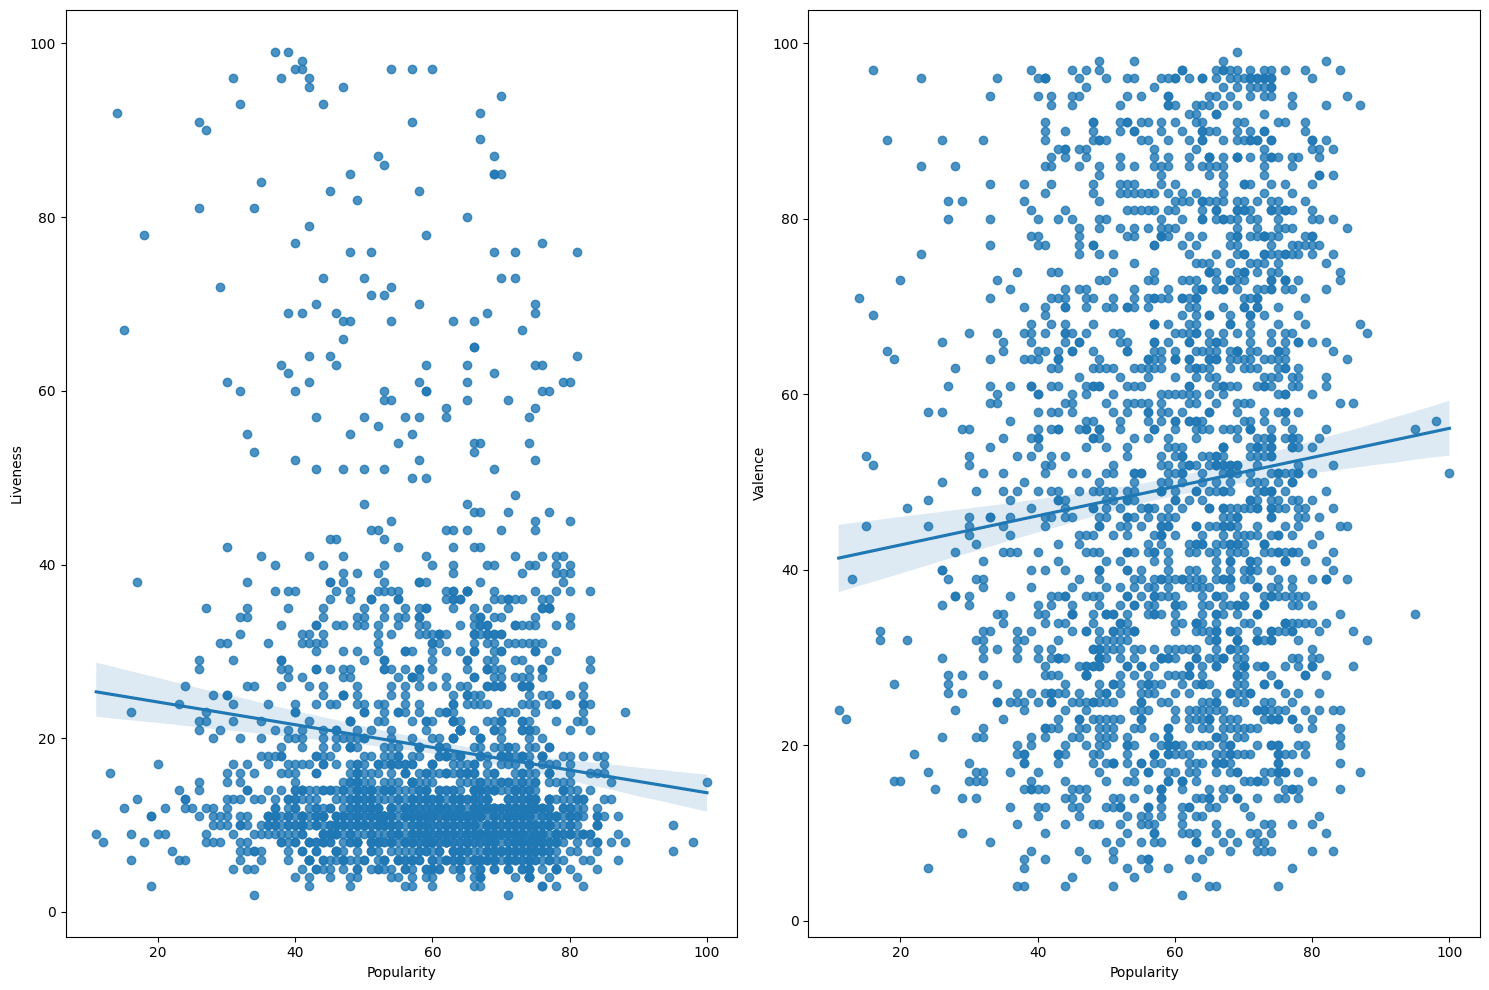

In [319]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=data['Popularity'], y=data['Liveness'], ax=ax1)
sns.regplot(x=data['Popularity'], y=data['Valence'], ax=ax2)
plt.tight_layout()

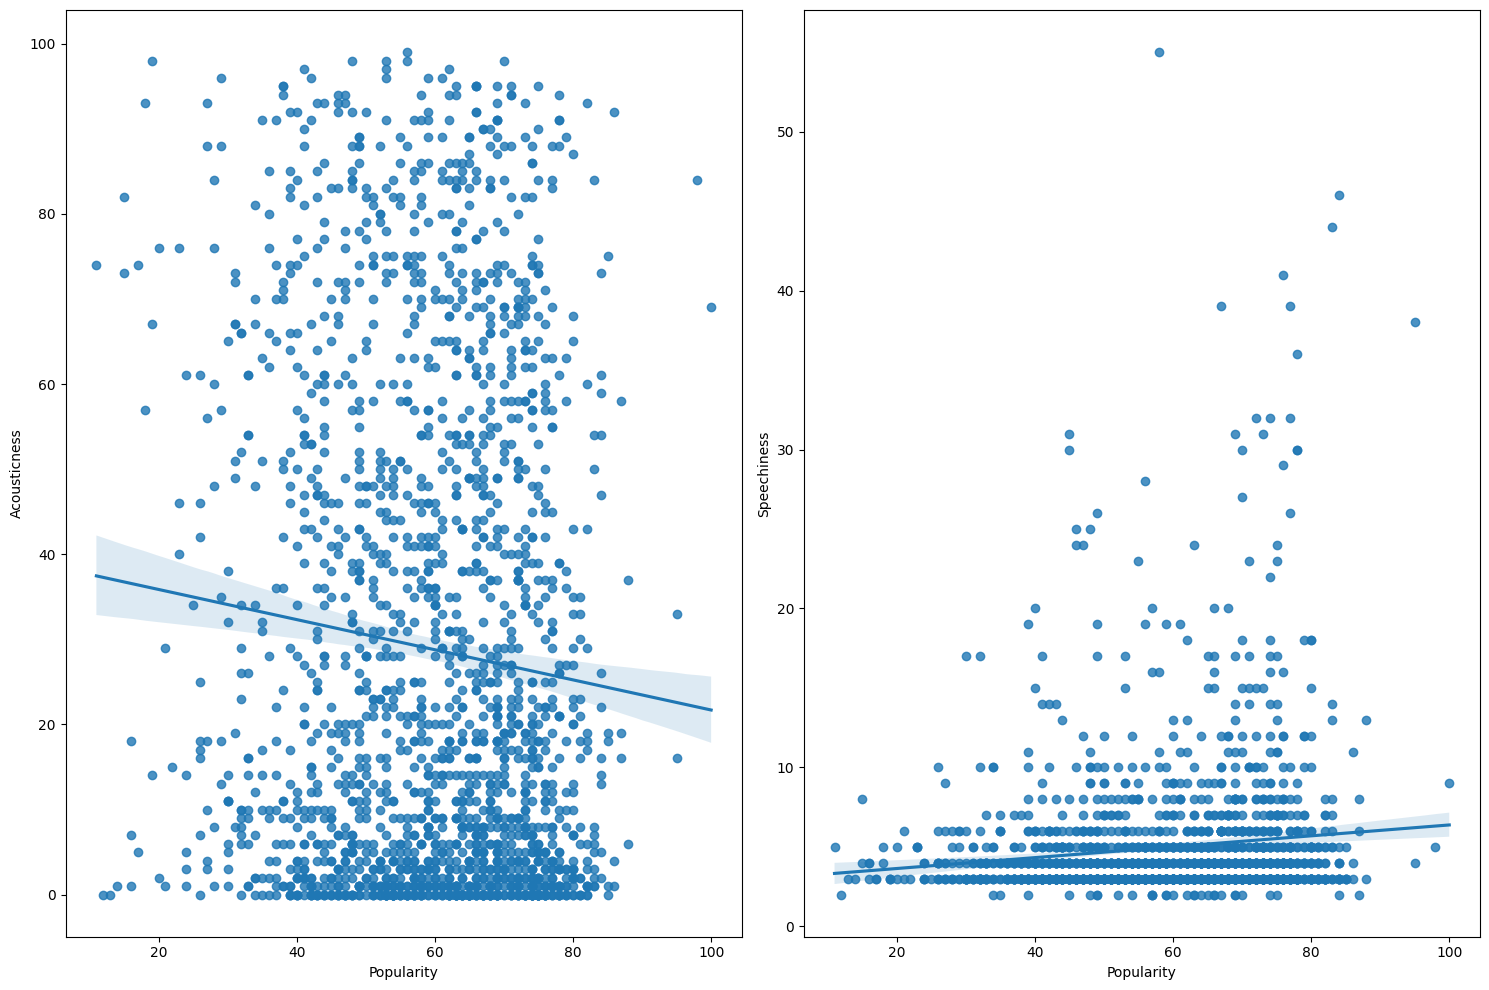

In [320]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=data['Popularity'], y=data['Acousticness'], ax=ax1)
sns.regplot(x=data['Popularity'], y=data['Speechiness'], ax=ax2)
plt.tight_layout()

#**BOX-PLOTS**

In [321]:
num_vars = ['Beats Per Minute (BPM)','Energy','Danceability','Loudness (dB)','Liveness','Valence','Acousticness','Speechiness','Popularity']

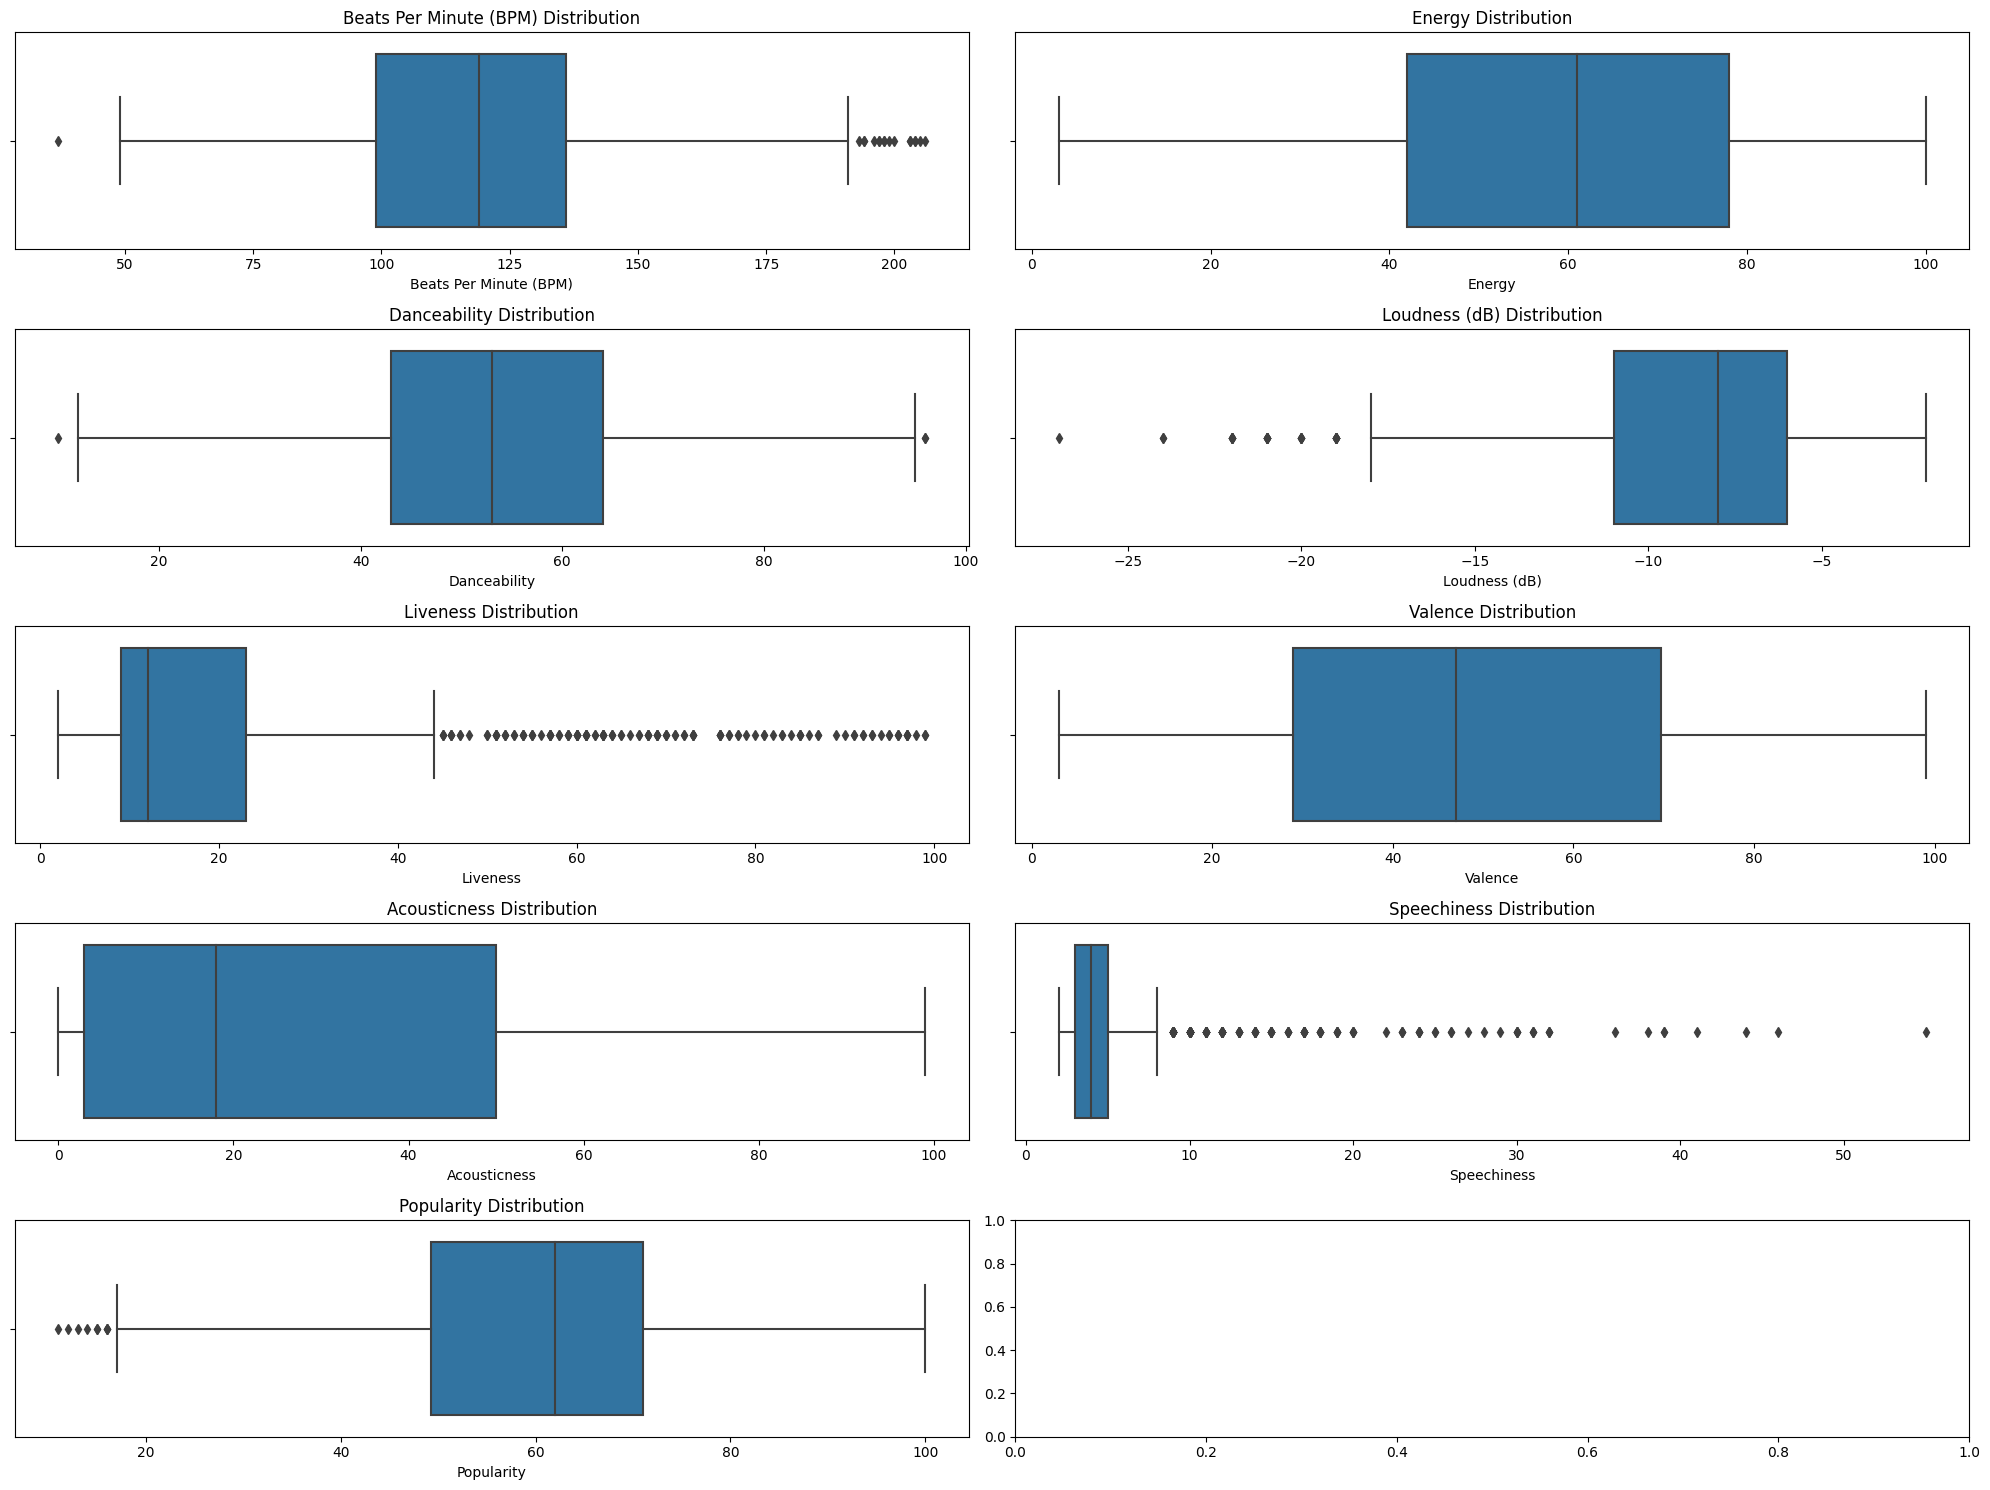

In [322]:
fig,axs = plt.subplots(nrows=5,ncols=2,figsize = (20,15))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(x=var,data=data,ax=axs[i])
  axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()
plt.show()

#**DEALING WITH OUTLIERS**

In [323]:
Q1=data['Beats Per Minute (BPM)'].quantile(0.25)
Q3=data['Beats Per Minute (BPM)'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
data = data[data['Beats Per Minute (BPM)']< Upper_Whisker]

99.0
136.0
37.0
43.5 191.5


In [324]:
Q1=data['Danceability'].quantile(0.25)
Q3=data['Danceability'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
data = data[data['Danceability']< Upper_Whisker]

43.0
64.0
21.0


In [325]:
Q1=data['Loudness (dB)'].quantile(0.25)
Q3=data['Loudness (dB)'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
data = data[data['Loudness (dB)']< Upper_Whisker]

-11.0
-6.0
5.0


In [326]:
Q1=data['Liveness'].quantile(0.25)
Q3=data['Liveness'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
data = data[data['Liveness']< Upper_Whisker]

9.0
23.0
14.0


In [327]:
Q1=data['Acousticness'].quantile(0.25)
Q3=data['Acousticness'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
data = data[data['Acousticness']< Upper_Whisker]

3.0
50.0
47.0


In [328]:
Q1=data['Speechiness'].quantile(0.25)
Q3=data['Speechiness'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
data = data[data['Speechiness']< Upper_Whisker]

3.0
5.0
2.0


In [329]:
Q1=data['Popularity'].quantile(0.25)
Q3=data['Popularity'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
data = data[data['Popularity']< Upper_Whisker]

49.0
70.0
21.0


#**DIMENSIONALITY REDUCTION**

In [330]:
data.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45


In [331]:
data2 = data.drop(['Title','Artist','Length (Duration)','Year'],axis=1)

In [332]:
data2.head()

,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Index,,,,,,,,,,
1,adult standards,157,30,53,-14,11,68,94,3,71
2,album rock,135,79,50,-11,17,81,17,7,39
4,alternative metal,173,96,43,-4,3,37,0,4,76
5,classic rock,106,82,58,-5,10,87,1,3,59
6,alternative pop rock,99,46,54,-9,14,14,0,2,45


In [333]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 1 to 1994
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Top Genre               1645 non-null   object
 1   Beats Per Minute (BPM)  1645 non-null   int64 
 2   Energy                  1645 non-null   int64 
 3   Danceability            1645 non-null   int64 
 4   Loudness (dB)           1645 non-null   int64 
 5   Liveness                1645 non-null   int64 
 6   Valence                 1645 non-null   int64 
 7   Acousticness            1645 non-null   int64 
 8   Speechiness             1645 non-null   int64 
 9   Popularity              1645 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 141.4+ KB


In [334]:
data2.select_dtypes(include='object').nunique()

Top Genre    135
dtype: int64

#**LABEL ENCODING**

In [335]:
from sklearn import preprocessing

In [336]:
for col in data2.select_dtypes(include = 'object').columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(data2[col].unique())

    data2[col] = label_encoder.transform(data2[col])

    print(f"{col}:{data2[col].unique()}")

Top Genre:[  1   4   7  56   9 123  70  96  75 122  10 115  79  74   6  98   2  38
  60 105 116  66  69 119  32  45  11  39  35  51  77  47  49 102  81  30
  73 126  36  90  42  31  78 129   0  80  44 121 132  13  26 128 113   8
  71  67  14  88  29  41  27 133 100  33  84  57  63  95  50  28  19  76
  37 103  21  12  18  23  92  87  83 114 104  86   3 106 130  17  20  64
 127 101  59  68  62 131 107 109  24  46  85  22  16  40  58  54  89 108
  91 125 124  15 134  93  82   5  48 120  53  52 112  65 118  72  61  43
  99  34  94 111  97 110  55 117  25]


In [337]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 1 to 1994
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Top Genre               1645 non-null   int64
 1   Beats Per Minute (BPM)  1645 non-null   int64
 2   Energy                  1645 non-null   int64
 3   Danceability            1645 non-null   int64
 4   Loudness (dB)           1645 non-null   int64
 5   Liveness                1645 non-null   int64
 6   Valence                 1645 non-null   int64
 7   Acousticness            1645 non-null   int64
 8   Speechiness             1645 non-null   int64
 9   Popularity              1645 non-null   int64
dtypes: int64(10)
memory usage: 141.4 KB


<Axes: >

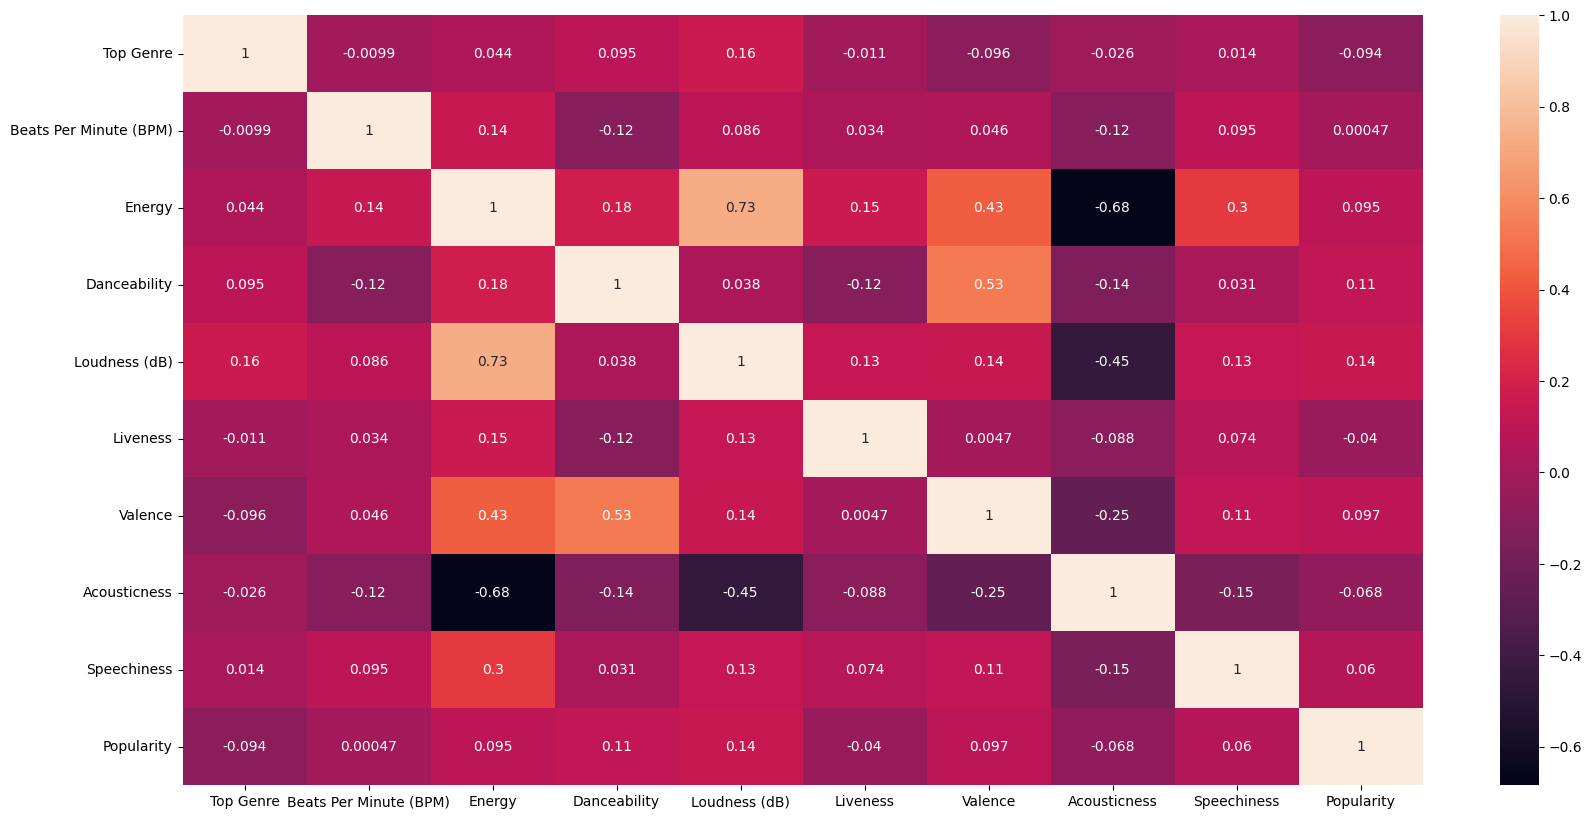

In [338]:
plt.figure(figsize=(20, 10))
sns.heatmap(data2.corr(), fmt='.2g', annot=True)

#**K-MEANS CLUSTERING (METHOD 1)**

In [339]:
data2.head()

,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Index,,,,,,,,,,
1,1,157,30,53,-14,11,68,94,3,71
2,4,135,79,50,-11,17,81,17,7,39
4,7,173,96,43,-4,3,37,0,4,76
5,56,106,82,58,-5,10,87,1,3,59
6,9,99,46,54,-9,14,14,0,2,45


In [340]:
data2.isnull().sum()

Top Genre                 0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [341]:
data.isnull().sum()

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [342]:
X1 = data2[['Energy','Beats Per Minute (BPM)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



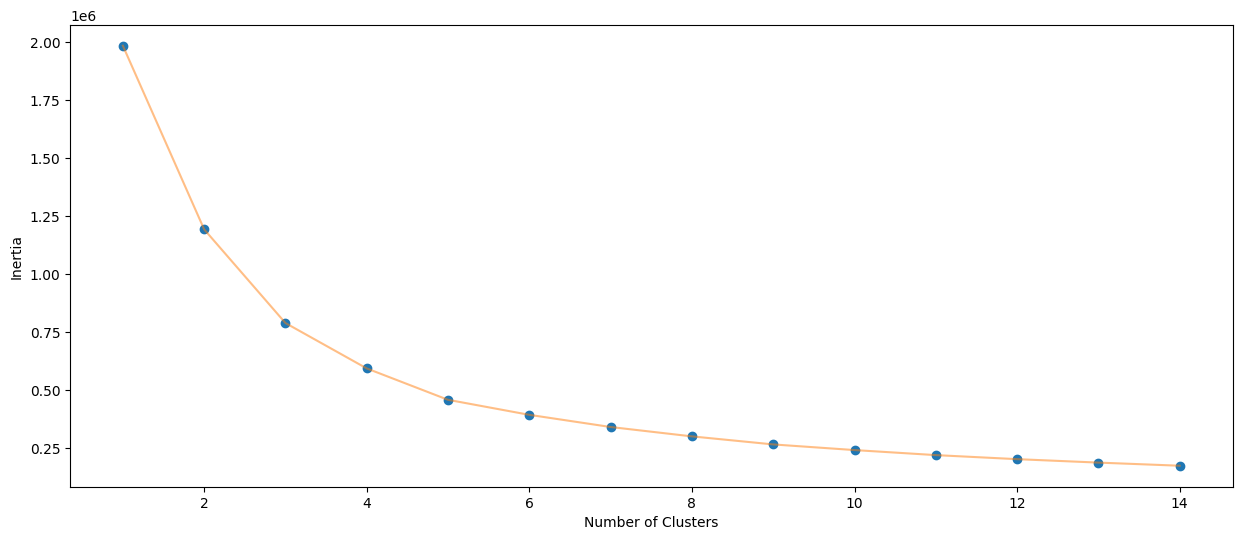

In [343]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [344]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [345]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
xyz_points = np.c_[xx.ravel(), yy.ravel()]
Z = algorithm.predict(xyz_points)

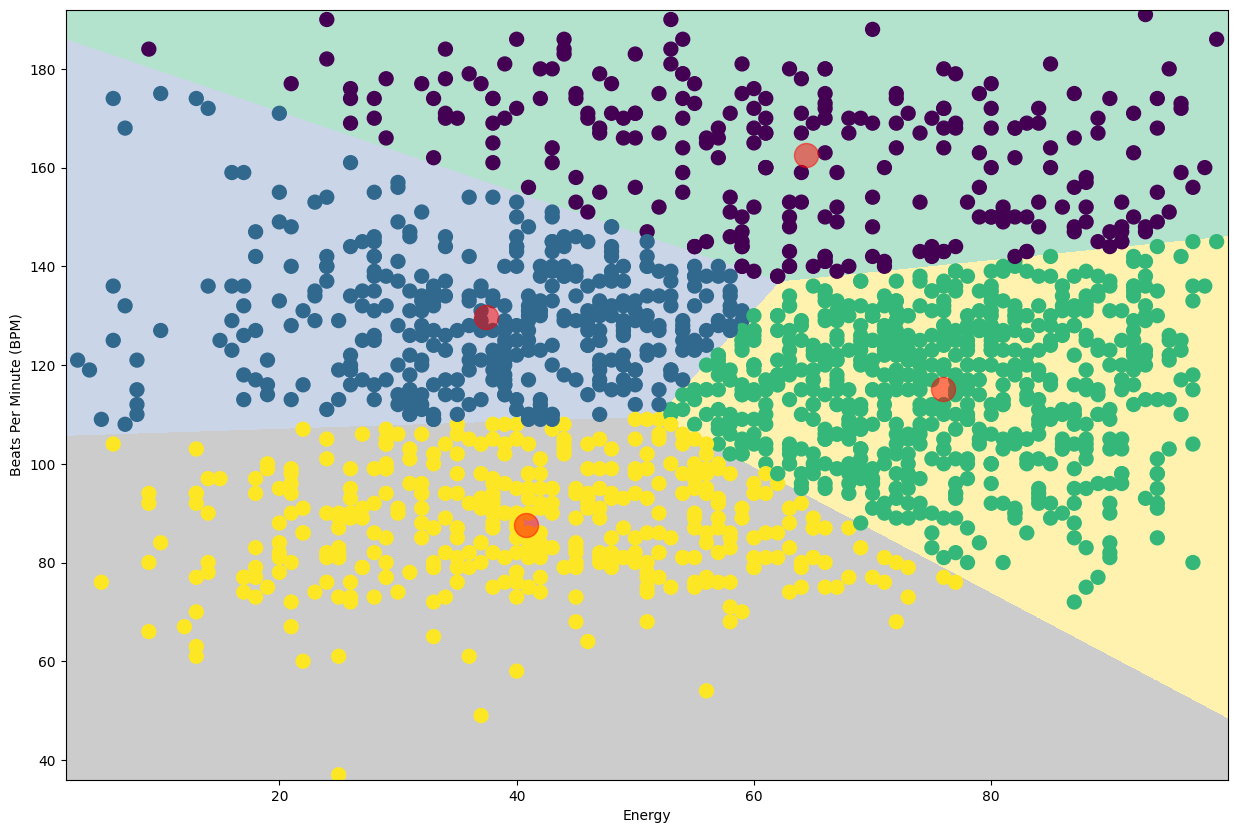

In [346]:
plt.figure(1 , figsize = (15 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Energy', y = 'Beats Per Minute (BPM)', data = data, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Beats Per Minute (BPM)') , plt.xlabel('Energy')
plt.show()

#**K-MEANS CLUSTERING (METHOD 2)**

In [347]:
from sklearn import preprocessing

In [348]:
for col in data.select_dtypes(include = 'object').columns:
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(data[col].unique())

  data[col] = label_encoder.transform(data[col])

  print(f"{col}:{data[col].unique()}")

Title:[1257  160 1343 ...  700 1279  177]
Artist:[389 135 196  76 102 348 172 169  32 413 108  15 371 258  39 246 162 236
 630 452   8 470 554 605 230 205 227 321 449 490  46 473 414 255 358 100
  54  41 221 457 278   1 476 500 504 433 420 360 253 617 164 498 602 175
  64 564  31 104 130  72 569 343 347 231 340 614  21  34 295 265 293 553
  27 471 372 298 579 243 532 580 277 173 336  26 526 406 359 547 390 606
 437 377 133 534 384 461 191 346 110  57 365 182 427 628 303 574 625  13
  55 125 144 222 224  63 251 127 472 136   7 380 594 160 140 522 443  97
 440 573  49  52 292 207   0 399  25  96 284 297 287 598 626 495 322 422
 398 180  18 338  94 370  17 129 450 375 400 558 281 184 334 509 501 421
 379 320 491 262   6 469 373 223 326 291  68 324 483 382 456 482 286 307
 237 609 620 245  42 282 131 600  86 352 107 121  77 306 460 404  10 493
 123  37 225 474 536 159 122 489 309  51 199 280 447  58 270 242 442 308
 247 168 294 596 361 565 622 627 170 446 393 328 592  35 275 134 538 405
 3

<Axes: >

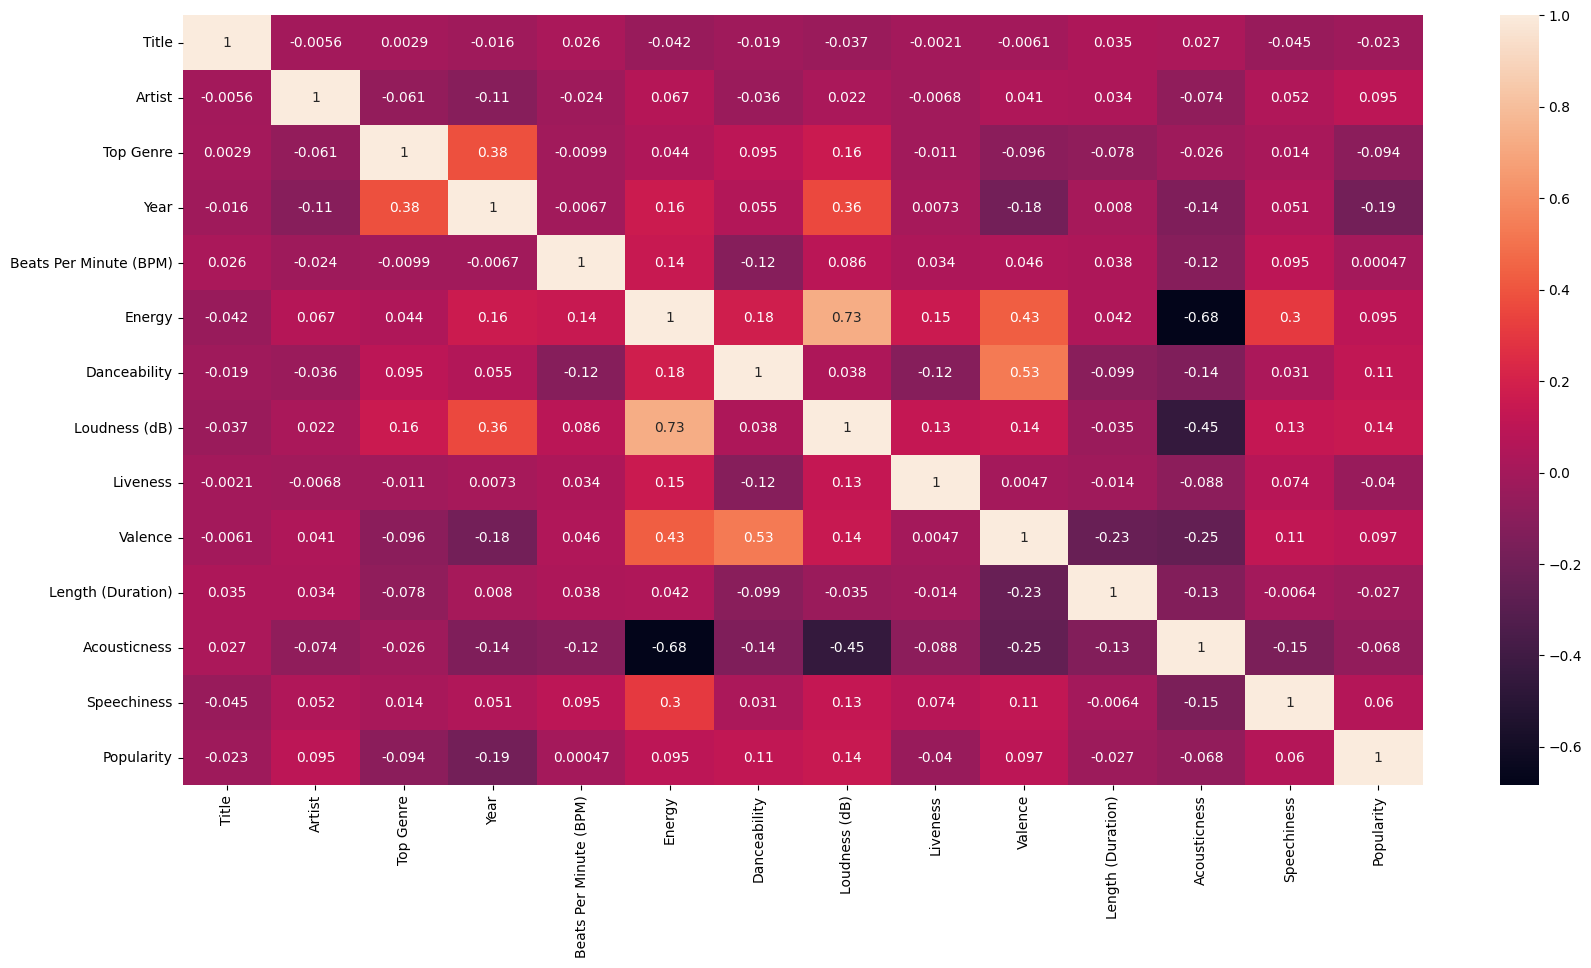

In [349]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), fmt='.2g', annot=True)

In [350]:
num_vars = data2[["Beats Per Minute (BPM)", "Energy","Danceability","Loudness (dB)",
              "Liveness", "Valence", "Acousticness",
              "Speechiness"]]

In [351]:
from sklearn.preprocessing import MinMaxScaler
for i in data2.columns:
    MinMaxScaler(i)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(num_vars)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [352]:

data["Music Segments"] = clusters
MinMaxScaler(data["Music Segments"])
data["Music Segments"] = data["Music Segments"].map({1: "Cluster 1", 2:
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5",
    6: "Cluster 6", 7: "Cluster 7", 8: "Cluster 8",
    9: "Cluster 9", 10: "Cluster 10"})

In [353]:
data.isnull().sum()

Title                       0
Artist                      0
Top Genre                   0
Year                        0
Beats Per Minute (BPM)      0
Energy                      0
Danceability                0
Loudness (dB)               0
Liveness                    0
Valence                     0
Length (Duration)           0
Acousticness                0
Speechiness                 0
Popularity                  0
Music Segments            158
dtype: int64

In [354]:
data['Music Segments'].fillna(data['Music Segments'].mode()[0], inplace = True)

In [355]:
data.isnull().sum()

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
Music Segments            0
dtype: int64

In [356]:
import plotly.graph_objects as go
plot = go.Figure()
for i in list(data["Music Segments"].unique()):


    plot.add_trace(go.Scatter3d(x = data[data["Music Segments"]== i]['Beats Per Minute (BPM)'],
                                y = data[data["Music Segments"] == i]['Energy'],
                                z = data[data["Music Segments"] == i]['Danceability'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
plot.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')


plot.update_layout(width = 1100, height = 900, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 10))

#**CONCLUSION**

The Music genres were clustered with the help of two different K-means methods consisting of 2-D and 3-D diagrams.